In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
from sqlalchemy import create_engine, inspect, func
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types
print("Measurement table \n")
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

print("\nStation table \n")    
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

Measurement table 

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Station table 

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
cursor = engine.execute('select * from Measurement order by date desc limit 1')
for i in cursor:
    print(i)

(2724, 'USC00519397', '2017-08-23', 0.0, 81.0)


In [12]:
x = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()
x

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [13]:
df = pd.DataFrame(x)
df.columns = ["Date", "Precipitation"]
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df = df.dropna()
df = df.sort_values(by="Date")
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


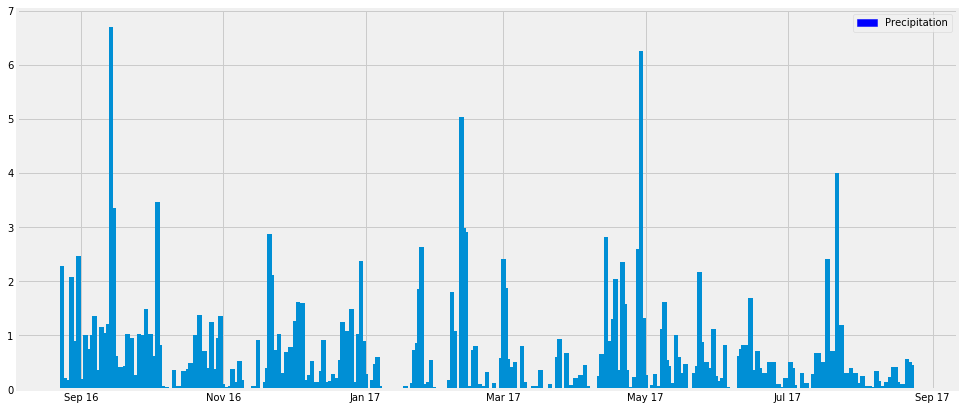

In [14]:
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

x = df.index.values
y = df['Precipitation']

fig, chart = plt.subplots(figsize=(15,7))
chart.bar(x, y, width=2)
chart.xaxis_date()
chart.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))

legend = mpatches.Patch(color='blue', label='Precipitation')
plt.legend(handles=[legend])
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
cursor = engine.execute('select count(*) from Station')
for i in cursor:
    print(i[0])

9


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
cursor = engine.execute('select count(*),station from Measurement group by station order by count(*) desc')
for i in cursor:
    print(i)

(2772, 'USC00519281')
(2724, 'USC00519397')
(2709, 'USC00513117')
(2669, 'USC00519523')
(2612, 'USC00516128')
(2202, 'USC00514830')
(1979, 'USC00511918')
(1372, 'USC00517948')
(511, 'USC00518838')


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
cursor = engine.execute("select station,min(tobs) from Measurement where station='USC00519281'")
for i in cursor:
    print("Minimum Temp:")
    print(i)
    print("\n")
cursor = engine.execute("select station,max(tobs) from Measurement where station='USC00519281'")
for i in cursor:
    print("Maximum Temp:")
    print(i)
    print("\n")
cursor = engine.execute("select station,round(avg(tobs), 2) from Measurement where station='USC00519281'")
for i in cursor:
    print("Mean Temp:")
    print(i)
    print("\n")

Minimum Temp:
('USC00519281', 54.0)


Maximum Temp:
('USC00519281', 85.0)


Mean Temp:
('USC00519281', 71.66)




In [19]:
results = []
# Choose the station with the highest number of temperature observations.
cursor = engine.execute('select count(tobs),station from Measurement group by station order by count(*) desc limit 1')
for i in cursor:
    print("Station with most tobs:")
    print(i)
    print("\n")
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
cursor = engine.execute('select * from Measurement where station="USC00519281" and date >"2016-08-18" order by date desc')
for i in cursor:
    results.append(i)

df2 = pd.DataFrame(results)
df2.columns = ["ID","Station","Date","Precipitation","Temp"]
df2["Date"] = pd.to_datetime(df2["Date"])

Station with most tobs:
(2772, 'USC00519281')




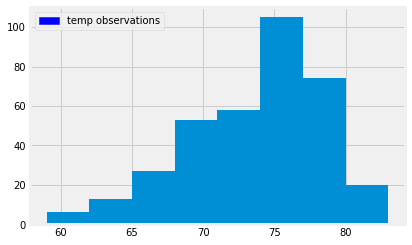

In [20]:
hist = df2["Temp"].hist(bins=8)
legend = mpatches.Patch(color='blue', label='temp observations')
plt.legend(handles=[legend])
plt.show()

In [21]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


MIN, MEAN, MAX
[(68.0, 74.71428571428571, 80.0)]


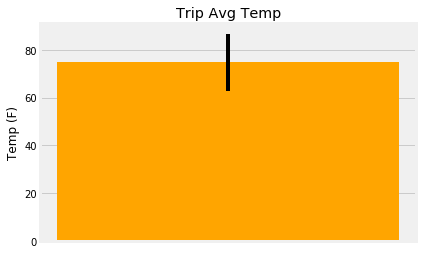

In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
print("MIN, MEAN, MAX")
print(calc_temps('2017-05-19', '2017-05-22'))
data = calc_temps('2017-05-19', '2017-05-22')
y = data[0][1]
error = (data[0][2])-(data[0][0])

fig, ax = plt.subplots()

rects1 = ax.bar([1], y, 1,
                alpha=1, color='orange',
                yerr=error)

ax.set_ylabel('Temp (F)')
ax.set_title('Trip Avg Temp')
ax.set_xticks([0])
plt.show()

In [23]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
cursor = engine.execute("""
SELECT Measurement.station, Measurement.date, Measurement.prcp, Station.name,
Station.latitude, Station.latitude, Station.elevation
FROM Measurement
INNER JOIN Station ON Measurement.station = Station.station 
where Measurement.date > "2017-05-19"
and Measurement.date < "2017-05-22"
order by Measurement.prcp desc;
""")
print("Station, Date, Precipitation, Name, Lat, Lon, Elevation")
for i in cursor:
    print(i)

Station, Date, Precipitation, Name, Lat, Lon, Elevation
('USC00519281', '2017-05-20', 0.02, 'WAIHEE 837.5, HI US', 21.45167, 21.45167, 32.9)
('USC00514830', '2017-05-20', 0.01, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, 21.5213, 7.0)
('USC00519281', '2017-05-21', 0.01, 'WAIHEE 837.5, HI US', 21.45167, 21.45167, 32.9)
('USC00519397', '2017-05-20', 0.0, 'WAIKIKI 717.2, HI US', 21.2716, 21.2716, 3.0)
('USC00519397', '2017-05-21', 0.0, 'WAIKIKI 717.2, HI US', 21.2716, 21.2716, 3.0)
('USC00513117', '2017-05-20', 0.0, 'KANEOHE 838.1, HI US', 21.4234, 21.4234, 14.6)
('USC00513117', '2017-05-21', 0.0, 'KANEOHE 838.1, HI US', 21.4234, 21.4234, 14.6)
('USC00519523', '2017-05-21', 0.0, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, 21.33556, 19.5)
('USC00516128', '2017-05-21', 0.0, 'MANOA LYON ARBO 785.2, HI US', 21.3331, 21.3331, 152.4)
('USC00519523', '2017-05-20', None, 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, 21.33556, 19.5)
('USC00516128', '2017-05-20', None, 'MANOA LYON ARBO

## Optional Challenge Assignment

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
start = "05-19"
end = "05-22"
dates = []
dates.append(start)
dates.append(end)
for i in range (20,22):
    dates.append("05-"+str(i))

for i in dates:
    normals.append(daily_normals(i))
dates

['05-19', '05-22', '05-20', '05-21']

In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

df3 = pd.DataFrame(np.array([normals[0][0], normals[1][0], normals[2][0], normals[3][0]]),
                   columns=['min', 'avg', 'max'])
df3['date']=dates
df3

,min,avg,max,date
0,65.0,73.807018,79.0,05-19
1,64.0,74.456140,80.0,05-22
2,68.0,73.896552,79.0,05-20
3,64.0,72.964286,80.0,05-21


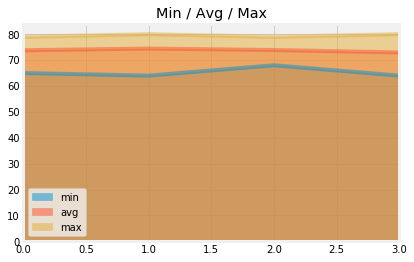

In [27]:
# Plot the daily normals as an area plot with `stacked=False`
df3.plot(kind='area', stacked=False, alpha=0.5,
        title='Min / Avg / Max')
plt.show()